In [1]:
import import_ipynb

In [2]:
%run iteration_0_imports.py

In [3]:
%run iteration_0_parameters.py

In [4]:
import iteration_0_utils as utils

importing Jupyter notebook from iteration_0_utils.ipynb


In [5]:
%whos

Variable                          Type        Data/Info
-------------------------------------------------------
HEALTHY                           str         H
IMG_IN_COLOR                      int         1
IMG_SIZE                          int         64
Image                             module      <module 'PIL.Image' from <...>packages\\PIL\\Image.py'>
NBR_SAMPLE                        int         20000
PATH_DATA                         str         ../data
PATH_DATA_EDA                     str         ../data/eda
PATH_DATA_LIST                    str         ../data/list
PATH_DATA_SAMPLE                  str         ../data/sample
PATH_MODEL                        str         ../model
PATH_ROOT                         str         ..
PATH_SOURCE_IMG                   str         ../cell_images
RandomForestClassifier            ABCMeta     <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
SICK                              str         S
classification_report             function

# make X, y

In [6]:
DATE_TIME = "2021-11-18_20-39-00"

In [7]:
# get list 
list_path_sample_img = []
list_path_sample_img.extend(glob.glob(PATH_DATA_SAMPLE+"/"+DATE_TIME+ "/"+ "*.pklz"))

In [8]:
# split train, validation, test set
list_path_sample_img_train, list_path_sample_img_test  = train_test_split(list_path_sample_img, test_size=0.2)
list_path_sample_img_train, list_path_sample_img_valid = train_test_split(list_path_sample_img_train, test_size=0.2)

In [9]:
def make_Xy(list_path_sample_img: list) -> (np.array, np.array):
    X = np.ndarray( (len(list_path_sample_img), IMG_SIZE, IMG_SIZE, 3) ,dtype = "float16")
    y = np.array([""] * len(list_path_sample_img))
    for i, path in tqdm(enumerate(list_path_sample_img)):
        
        X[i] = utils.pickle_read(path).astype("float16")
    
        _, file_name, _ = utils.split_file_info(path)
        y[i] = file_name[0]
    
    return X, y
    

In [10]:
X_train, y_train  = make_Xy(list_path_sample_img_train)

12800it [00:09, 1318.14it/s]


In [11]:
X_valid, y_valid  = make_Xy(list_path_sample_img_valid)

3200it [00:02, 1250.76it/s]


In [12]:
X_test, y_test  = make_Xy(list_path_sample_img_test)

4000it [00:03, 1298.23it/s]


# model_cnn

* Ref: https://towardsdatascience.com/detecting-malaria-with-deep-learning-9e45c1e34b60
* https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d

In [13]:
BATCH_SIZE = 500
NUM_CLASSES = 2
EPOCHS = 25
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

In [14]:
# Encoder y
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
y_train_enc = le.fit_transform(y_train)

In [17]:
y_valid_enc = le.transform(y_valid)
y_test_enc  = le.transform(y_test)

In [18]:
le.classes_

array(['H', 'S'], dtype='<U1')

In [19]:
#!pip uninstall tensorflow

Créer un fichier .reg avec les instructions suivantes :

===

Windows Registry Editor Version 5.00

[HKEY_LOCAL_MACHINE\SYSTEM\CurrentControlSet\Control\FileSystem]
"LongPathsEnabled"=dword:00000001

---

Exécuter le .reg

In [20]:
#!pip install tensorflow

In [21]:
import tensorflow as tf

In [22]:
from keras.models import Sequential

In [23]:
#assert False

In [24]:
def plot_history(history):
    plt.figure(figsize=(16,9))
    # plot loss
    plt.subplot(211)
    plt.grid()
    plt.title('binary_crossentropy')
    plt.plot(history.history['loss'], "o-", color='blue', label='train')
    plt.plot(history.history['val_loss'], "o-", color='orange', label='validation')
    plt.legend()    
    # plot accuracy
    plt.subplot(212)
    plt.grid()
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], "o-",color='blue', label='train')
    plt.plot(history.history['val_accuracy'], "o-",color='orange', label='validation')
    plt.legend()
    plt.show()

In [25]:
model_cnn_4 = Sequential()
model_cnn_4.add(tf.keras.layers.Input(name = "input", shape=INPUT_SHAPE))
model_cnn_4.add(tf.keras.layers.Conv2D(name = "conv2D",
                                     filters=32,
                                     kernel_size=(3,3),
                                     activation="LeakyReLU",
                                     padding="same",
                                     kernel_initializer="he_uniform"
                                    ))
model_cnn_4.add(tf.keras.layers.MaxPooling2D(name="pooling", pool_size=(2,2)))
model_cnn_4.add(tf.keras.layers.Conv2D(name = "conv2D_2",
                                     filters=64,
                                     kernel_size=(3,3),
                                     activation="LeakyReLU",
                                     padding="same",
                                     kernel_initializer="he_uniform"
                                    ))
model_cnn_4.add(tf.keras.layers.MaxPooling2D(name="pooling_2", pool_size=(2,2)))
model_cnn_4.add(tf.keras.layers.Flatten(name="flatten"))
model_cnn_4.add(tf.keras.layers.Dense(name="dense_hidden", units = 256, activation="LeakyReLU",
                                    kernel_initializer="he_uniform" ))
model_cnn_4.add(tf.keras.layers.Dense(name="dense_hidden_2", units = 128, activation="LeakyReLU",
                                    kernel_initializer="he_uniform" ))
model_cnn_4.add(tf.keras.layers.Dense(name="ouput", units = 1, activation="sigmoid"))


In [26]:
# compiler modele
model_cnn_4.compile(optimizer = "adam", loss ="binary_crossentropy", metrics=["accuracy"])

In [27]:
model_cnn_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2D (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 pooling (MaxPooling2D)      (None, 32, 32, 32)        0         
                                                                 
 conv2D_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 pooling_2 (MaxPooling2D)    (None, 16, 16, 64)        0         
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense_hidden (Dense)        (None, 256)               4194560   
                                                                 
 dense_hidden_2 (Dense)      (None, 128)               3

In [28]:
X_train.shape

(12800, 64, 64, 3)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
aug = ImageDataGenerator(rotation_range=359, \
                         zoom_range=0.15, \
                         width_shift_range=0.2, height_shift_range=0.2, \
                         shear_range=0.15, \
                         horizontal_flip=True, \
                         vertical_flip=True, \
                         fill_mode="nearest")

In [31]:
"""
model.fit(datagen.flow(x_train, y_train, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(x_train, y_train,
         batch_size=8, subset='validation'),
         steps_per_epoch=len(x_train) / 32, epochs=epochs)
"""

"\nmodel.fit(datagen.flow(x_train, y_train, batch_size=32,\n         subset='training'),\n         validation_data=datagen.flow(x_train, y_train,\n         batch_size=8, subset='validation'),\n         steps_per_epoch=len(x_train) / 32, epochs=epochs)\n"

In [32]:
# Image de validation augmentées aussi par erreur.
history_4 = model_cnn_4.fit( \
                            aug.flow(X_train, y_train_enc, batch_size=BATCH_SIZE, subset=None), \
                            validation_data = aug.flow(X_valid, y_valid_enc, subset=None), \
                            steps_per_epoch = len(X_train) // BATCH_SIZE, \
                            epochs = EPOCHS
                        )

Epoch 1/25
25/25 [==============================] - 37s 1s/step - loss: 1.9781 - accuracy: 0.5324 - val_loss: 0.6667 - val_accuracy: 0.6078
Epoch 2/25
25/25 [==============================] - 34s 1s/step - loss: 0.6506 - accuracy: 0.6237 - val_loss: 0.6515 - val_accuracy: 0.6306
Epoch 3/25
25/25 [==============================] - 34s 1s/step - loss: 0.6310 - accuracy: 0.6515 - val_loss: 0.6179 - val_accuracy: 0.6803
Epoch 4/25
25/25 [==============================] - 34s 1s/step - loss: 0.6166 - accuracy: 0.6730 - val_loss: 0.6033 - val_accuracy: 0.6950
Epoch 5/25
25/25 [==============================] - 34s 1s/step - loss: 0.6074 - accuracy: 0.6789 - val_loss: 0.6211 - val_accuracy: 0.6616
Epoch 6/25
25/25 [==============================] - 34s 1s/step - loss: 0.6091 - accuracy: 0.6708 - val_loss: 0.5917 - val_accuracy: 0.6875
Epoch 7/25
25/25 [==============================] - 34s 1s/step - loss: 0.5843 - accuracy: 0.6964 - val_loss: 0.5585 - val_accuracy: 0.7231
Epoch 8/25
25/25 [==

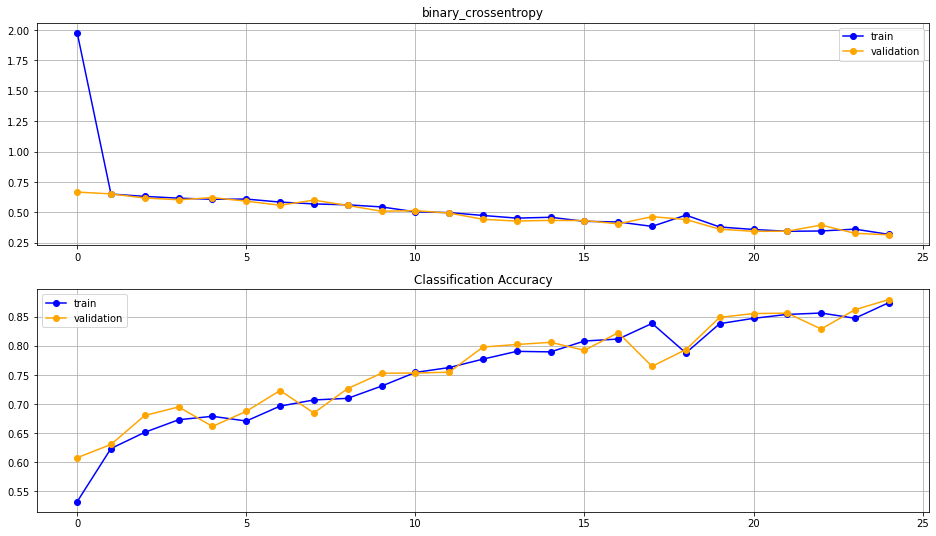

In [33]:
plot_history(history_4)

In [34]:
len(X_train) // BATCH_SIZE

25

In [36]:
"""
history_4 = model_cnn_4.fit_generator( \
                            aug.flow(X_train, y_train_enc, batch_size=BATCH_SIZE, subset=None), \
                            validation_data = (X_valid, y_valid_enc), \
                            steps_per_epoch = len(X_train) // BATCH_SIZE, \
                            epochs = EPOCHS
                        )
"""

'\nhistory_4 = model_cnn_4.fit_generator(                             aug.flow(X_train, y_train_enc, batch_size=BATCH_SIZE, subset=None),                             validation_data = (X_valid, y_valid_enc),                             steps_per_epoch = len(X_train) // BATCH_SIZE,                             epochs = EPOCHS\n                        )\n'

In [37]:
#plot_history(history_4)

In [38]:
history_4 = model_cnn_4.fit( \
                            aug.flow(X_train, y_train_enc, batch_size=BATCH_SIZE, subset=None), \
                            validation_data = (X_valid, y_valid_enc), \
                            steps_per_epoch = len(X_train) // BATCH_SIZE, \
                            epochs = EPOCHS
                        )

Epoch 1/25
25/25 [==============================] - 32s 1s/step - loss: 0.3065 - accuracy: 0.8811 - val_loss: 0.3426 - val_accuracy: 0.8641
Epoch 2/25
25/25 [==============================] - 32s 1s/step - loss: 0.2837 - accuracy: 0.8901 - val_loss: 0.3494 - val_accuracy: 0.8475
Epoch 3/25
25/25 [==============================] - 32s 1s/step - loss: 0.2810 - accuracy: 0.8923 - val_loss: 0.2296 - val_accuracy: 0.9141
Epoch 4/25
25/25 [==============================] - 32s 1s/step - loss: 0.2744 - accuracy: 0.8940 - val_loss: 0.2030 - val_accuracy: 0.9247
Epoch 5/25
25/25 [==============================] - 32s 1s/step - loss: 0.2685 - accuracy: 0.8966 - val_loss: 0.2066 - val_accuracy: 0.9234
Epoch 6/25
25/25 [==============================] - 32s 1s/step - loss: 0.2619 - accuracy: 0.8991 - val_loss: 0.2024 - val_accuracy: 0.9294
Epoch 7/25
25/25 [==============================] - 32s 1s/step - loss: 0.2655 - accuracy: 0.8989 - val_loss: 0.2222 - val_accuracy: 0.9216
Epoch 8/25
25/25 [==

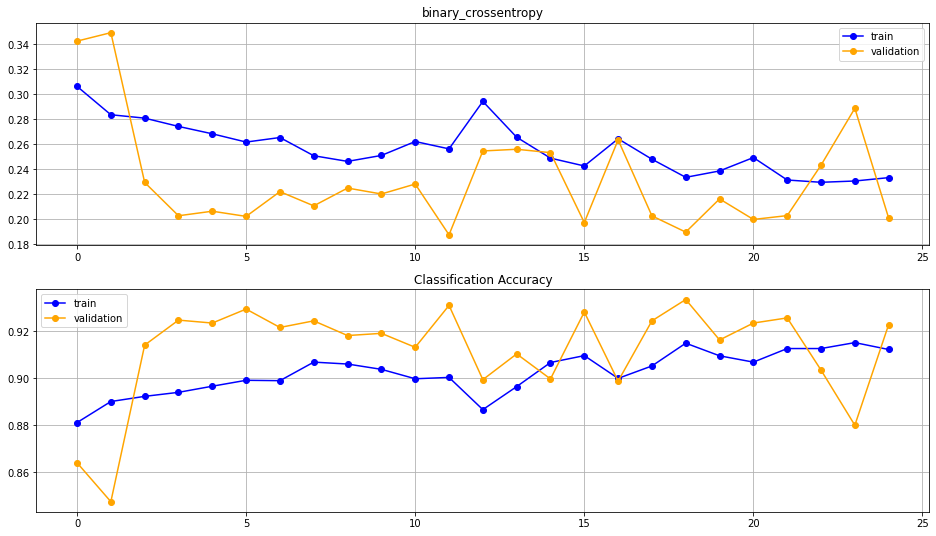

In [39]:
plot_history(history_4)

In [ ]:
#model_cnn_4.save(PATH_MODEL + "/model_cnn_4.h5")

Keras avec GPU AMD
https://medium.com/@Vatsal410/keras-without-nvidia-gpus-with-plaidml-and-amd-gpu-4ba6f60025ce